# An introduction to machine learning using Python

This couse is desiged to give a gentle but practical introduction to the basic concepts encountered in machine learning. There will be very little maths involved and the Python programming used to run through the course will be fairly straightforward. This will hopefully be sufficient to demonstrate the key, high-level concepts behind machine learning and introduce a basic operational workflow. The objective is to empower the programmer to experiment with their own projects. Learning about the more mathematical inner workings of the machine learning approaches may well be of interest to those who wish to delve further. However, in many cases this is not necessary to get a degree of intuition about the process and generate practical learning models.

The examples in this course will mostly be examples of *supervised* learning; machine learning models where the objective relates to some target data that is separate from the input data to learn from. An example here would be to learn the classification of an image; the target classification (the label) is a somewhat separate quality from the input, although hopefully derivable from it. Where there is no separate set of target data, machine learning can be decribed as *unsupervised* and in these cases the objective is to learn to structure, or transform, the data to reveal its underlying organisation. It is notable that supervised and unsupervised aspects are mixed together in some cases, and so the supervised/unsupervised disctinction is more of a guide than a strict partition.

An often mentioned aspect of machine learning, which will not be covered here, is *reinforcement* learning. This is 
is like unsupervised learning, in that it has no separately supplied target data/labels. However, the learning objective responds to a reward from an external environment. An example would be a car learning to drive within the street envrionment indicated by its sensors, rewarded by following the rules of the road and not crashing.


## Python modules for machine learning

As we move through machine learning concepts here we will make extensive use of the SciKit learn Python library. This is an excellent collection of almost everything we will need to get started. It should be noted that we will initially only cover the more traditional, non-deep leaning methods; deep neural networks will be covered in the next course.

For this course, a basic familiarity with the Python language and the NumPy module is assumed. The Python Beginners' Course and Numeric Python Course are provided separately if needed. 

Our first Python code is to import the handy modules that we will be using throughout: Numpy, asliased as `np` is for the array/tensor based operations, `sklearn` provides the specialise machine learning functions and pyplot, asliased as `plt` allows us to visualise the data in a graphical way.

In [418]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import warnings
from matplotlib.colors import LinearSegmentedColormap

## Separating data clusters

For our first example we will consider some synthetic data. The data is 2D and can be thought of as a seris of (x,y) points. This is perhaps trivial and dull data, but it will get to the crux of what machine lerning is all about.

The synthetic data will be constructed by making three groups of normally distributed (Gaussian) data. Each group distribution has a different parameters: a centre; `[x,y]` mean, and a spread; cirular standard deviation. The three data groups are made of 50, 100, and 200 points sampled randomly from thre three distributions.

In [210]:
# Normally distributed random numbers : needs mean, STD and array size
group1 = np.random.normal([-0.2, 0.0], 0.3, (50,2)) 
group2 = np.random.normal([0.8, 0.8], 0.2, (100,2))
group3 = np.random.normal([0.0, 1.0], 0.5, (200,2))

The three groups are then joined into one 2D array, via `concatenate`, and we can extract the X- and X- coordnates of this array to plot the overall data. Note thate we slice the data like `group_data[:,0]` to get the X coord because the data array has data points along its first (row) axis and coordinates along its second (column) axis.

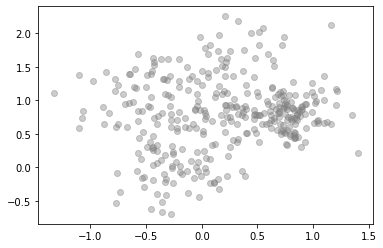

In [363]:
mixed_data = np.concatenate([group1, group2, group3])

group_x = mixed_data[:,0]
group_y = mixed_data[:,1]

plt.scatter(group_x, group_y, color='#808080', alpha=0.4)

To go with this data we constrict an array (350 values) that contains the original, true group identities of all these points. This will be done using integer values `0`, `1` and `2` to inducate the group label. These labels will then serve as the idealised targets for machine laerning models to recreate.

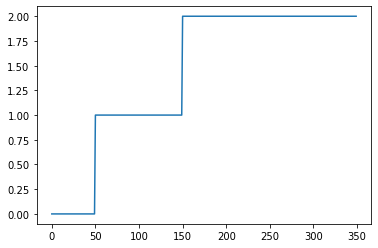

In [361]:
true_classes = np.zeros(350)
true_classes[50:150] = 1
true_classes[150:] = 2
 
plt.plot(true_classes) 

To visualise the true/target group labels we can plot the original groups separately in different colours. Note that there is some overlap between the classes and so we would not expect to be able to separate these perfectly based on [x,y] location.

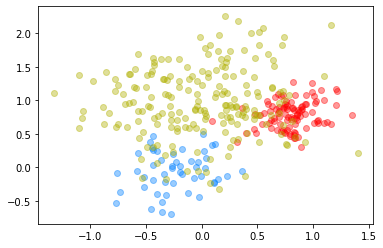

In [362]:
plt.scatter(group1[:,0], group1[:,1], color='#0080FF', alpha=0.4)
plt.scatter(group2[:,0], group2[:,1], color='#FF0000', alpha=0.4)
plt.scatter(group3[:,0], group3[:,1], color='#B0B000', alpha=0.4)

The first larning approach use here, to separate and classify the mixed data, is via k-means clustering. Basic clustering will be used to separate the data, and then using the leaarned separation rules (boundaries) we can make predictive classifications, on data not used in the initial clustering.

As is typical with `sklearn`, we employ one of its modules to create a *model*. Here the model simply refers to a parameterised method for discriminating or transforming data, that can learn by adaptation to a training dataset. Here the adaptation is done by invoking `.fit()` on the mixed group data. The value of `3` passed to the `KMeans` model states the number of clusters to assume in the fit.

In [364]:
kmeans_model = sklearn.cluster.KMeans(3, random_state=7)
kmeans_model.fit(mixed_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


Once the data is fit to the model we can inspect its attributes to see the results. Here we look at `.labels` that provides an integer array of classifiations, indication which cluster, of the three possibilities, each point belongs to.

In [366]:
k_classes = kmeans_model.labels_
print(k_classes[:10])

[0 0 0 0 0 0 0 0 0 0]


The class labels `k_classes` can then be used to colour the mixed data. Note how linear boundaries are used to separate three clusters. The boundaries arise because k-means clustering defines cluster centres and then allocates points to the closest centre.

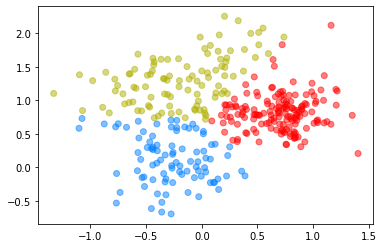

In [423]:
cmap1 = LinearSegmentedColormap.from_list(name='CMAP01', colors=['#0080FF','#FF0000','#B0B000'], N=25)
plt.scatter(group_x, group_y, c=k_classes, alpha=0.5, cmap=cmap1)

Next, three new points `pred_points` are defined, which we can superimpose upon the clusters, here as black spots.

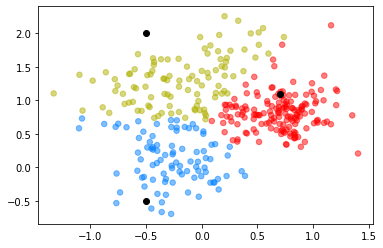

In [422]:
pred_points = np.array([[-0.5, 2.0], [0.7, 1.1], [-0.5, -0.5]])
plt.scatter(group_x, group_y, c=k_classes, s=30, alpha=0.5, cmap=cmap1)
plt.scatter(pred_points[:,0], pred_points[:,1], color='k')

To obtain the classification for the new points the `.predict()` method is run, from the previously fitted model, using these points. In essence, the model is determining which region the each of the new [x,y] coordinates lies within. Note that although the clusters separated here mostly match the input, original groups the actual indec numbers used to label each class are somewhat arbitrary and are often swapped round.

In [374]:
print(kmeans_model.predict(pred_points))

[2 1 0]


To get a clearer indication of the decsion boundaries used for this classification we can run the model prediction on a wide sample of points to observe the outcome.

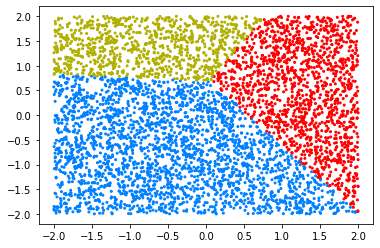

In [424]:
sample_data = np.random.uniform(-2.0, 2.0, (5000, 2))
sample_classes = kmeans_model.predict(sample_data)
plt.scatter(sample_data[:,0], sample_data[:,1], c=sample_classes, s=4, cmap=cmap1)

The next ML method to try moves beyond simple clustering to a more canonical machine learning method: k-nearest neighbours (k-NN). With the clustering we let the model fit into a given number of classes. However, for k-NN (like many ML methods) we will specify input data, to train on, with paired target labels. Accordingly ,each input [x,y] point (`mixed_data`) has a corresonding class integer (0, 1 or 2), indicating its true identity (`true_classes`).

The k-NN model is created and fit to the data in the manner typical of `sklearn`' Here the `KNeighboursClassifier` has the number of neighbours parameter set to `5`, but you may like to see the effect of choosing other values. 

In [407]:
knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(mixed_data, true_classes)
knn_classes = knn_model.predict(mixed_data)

Internally the k-NN method makes predictions on unseen datapoints by taking a poll of its *k* nearest neighbours (*k*=5 here) with a class label. The majoriy class label from the training neigbours is then taken as the prediction for the unseen point. As is illustrated in the below plots, the k-NN often has curved decision boundaries, which can more or less closely hug the training labels, according to the value of *k*.

Text(0.5, 1.0, 'True Class')

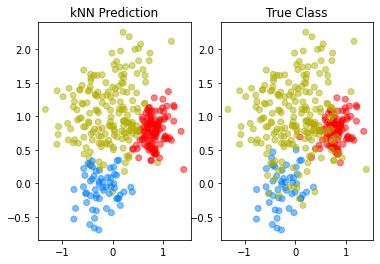

In [425]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(group_x, group_y, c=knn_classes, alpha=0.5, cmap=cmap1)
ax1.set_title('kNN Prediction')
ax2.scatter(group_x, group_y, c=true_classes, alpha=0.5, cmap=cmap1)
ax2.set_title('True Class')

For contrast we will show another, commonly used, type of machine leaning model. This is a kind of Support Vector Machine (SVM); we will skip discussion of the inner workings of this method, but suffice it to mention that SVMs are able to separate data by applying a *kernel function* to the data to spread the data into extra dimensions (new axes) according to their training label. Here you can imagine that each of the training [x,y] points is given an extra "z" coorinate so that the three classes are separated into different layers. The decision boundaries between label classes will be flat planes though this higher dimensional space, but these may appear as curves when projected down to the origainal 2D.

The model is generated and fit from using the support vector classifier method (`SVC()`), which is a subtype of SVM.

In [403]:
svm_model = sklearn.svm.SVC()
svm_model.fit(mixed_data, true_classes)
svm_classes = svm_model.predict(mixed_data)

Plotting the predictions for this method, albeit for the training data, shows that the separation is according to curved boundary, which fits the data resonably well.

Text(0.5, 1.0, 'True Class')

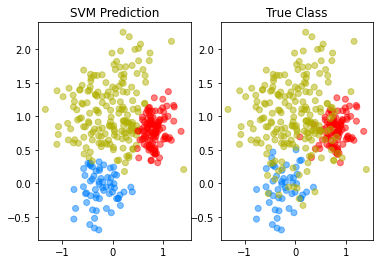

In [426]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(group_x, group_y, c=svm_classes, alpha=0.5, cmap=cmap1)
ax1.set_title('SVM Prediction')
ax2.scatter(group_x, group_y, c=true_classes, alpha=0.5, cmap=cmap1)
ax2.set_title('True Class')

##  <font color="purple">Exercise:</font>

<font color="purple">As the demo data is really generated by a mixture of Gussians, in reality the most appropriate ML method to apply would be the Gaussian Mixture Model. This aims to recapitulate the means and standard distributions of an number of underlying distributions. Also, this method is useful in that we can quantify the degree of class overlap, betweeen two or mode deconvolved Gaussians, for any point.

As an exercise fit a `class sklearn.mixture.GaussianMixture` model for the data, in a similar manner to other approaches. The run `.predict()` and plot the output as a scatter, similar to above.

</font>

In [ ]:
gmm_model = sklearn.mixture.GaussianMixture(n_components=3)  # Model as 3 normal distribs

# Exercise code goes here

gmm_classes = ...

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(group_x, group_y, c=gmm_classes, alpha=0.5, cmap=cmap1)
ax1.set_title('GMM Prediction')
ax2.scatter(group_x, group_y, c=true_classes, alpha=0.5, cmap=cmap1)
ax2.set_title('True Class')

Using the random sampling approach, as before, we can explore the 2D decision boundaries for each of the ML methods used so far. Note how the different methods have different shaped boundaries and that this will have an impact on how the classifier extrapolates to values distant from the training data.

Text(0.5, 1.0, 'Support Vector')

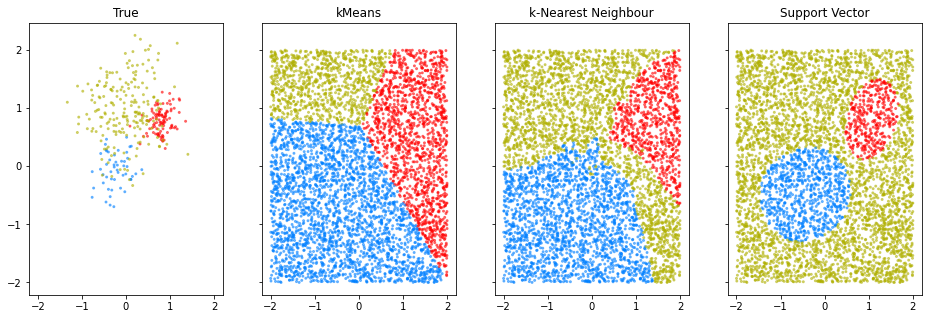

In [427]:
sample_data = np.random.uniform(-2.0, 2.0, (5000, 2)) # 5000 times [x,y] pointsm, sampled uniformly from -2 to 2 
sample_x, sample_y = sample_data.T

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_size_inches(16,5)
plot_params = dict(s=4, alpha=0.5, cmap=cmap1)

ax0.scatter(group_x, group_y, c=true_classes, **plot_params)
ax0.set_title('True')

ax1.scatter(sample_x, sample_y, c=kmeans_model.predict(sample_data), **plot_params)
ax1.set_title('kMeans')

ax2.scatter(sample_x, sample_y, c=knn_model.predict(sample_data), **plot_params)
ax2.set_title('k-Nearest Neighbour')

ax3.scatter(sample_x, sample_y, c=svm_model.predict(sample_data), **plot_params)
ax3.set_title('Support Vector')

Discuss extrapolation

Add a null class?

In [434]:
# Create random data for a new, null, class
null_data = np.random.uniform(-2.0, 2.0, (100, 2))
null_labels = np.full(100, 3)

# Extend otiginal trainaing data, and target labels, woth null dta
extended_data = np.concatenate([mixed_data, null_data])
extended_classes = np.concatenate([true_classes, null_labels])

kmeans_model2 = sklearn.cluster.KMeans(4, random_state=7)
kmeans_model2.fit(extended_data)
#kmeans_classes_2.fit(extended_data)

knn_model2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(extended_data, extended_classes)
#knn_classes2 = knn_model2.predict(extended_data)

svm_model2 = sklearn.svm.SVC()
svm_model2.fit(extended_data, extended_classes)
#svm_classes2 = svm_model2.predict(mixed_data)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Text(0.5, 1.0, 'Support Vector')

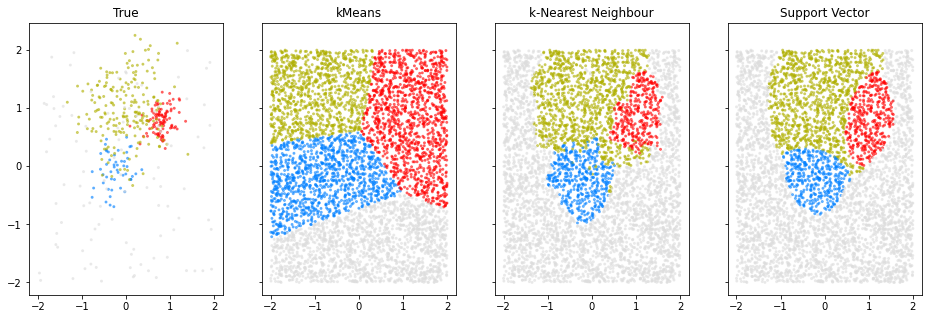

In [436]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_size_inches(16,5)
cmap2 = LinearSegmentedColormap.from_list(name='CMAP01', colors=['#0080FF','#FF0000','#B0B000','#DDDDDD'], N=25)
plot_params = dict(s=4, alpha=0.5, cmap=cmap2)

ax0.scatter(extended_data[:,0], extended_data[:,1], c=extended_classes, **plot_params)
ax0.set_title('True')

ax1.scatter(sample_x, sample_y, c=kmeans_model2.predict(sample_data), **plot_params)
ax1.set_title('kMeans')

ax2.scatter(sample_x, sample_y, c=knn_model2.predict(sample_data), **plot_params)
ax2.set_title('k-Nearest Neighbour')

ax3.scatter(sample_x, sample_y, c=svm_model2.predict(sample_data), **plot_params)
ax3.set_title('Support Vector')

## Test train split

In [664]:
from sklearn.model_selection import train_test_split
in_train, in_test, target_train, target_test = train_test_split(extended_data, extended_classes)

In [665]:
svm_model3 = sklearn.svm.SVC()
svm_model3.fit(in_train, target_train)
svm_pred3 = svm_model3.predict(in_test)

Text(0.5, 1.0, 'test - Predict')

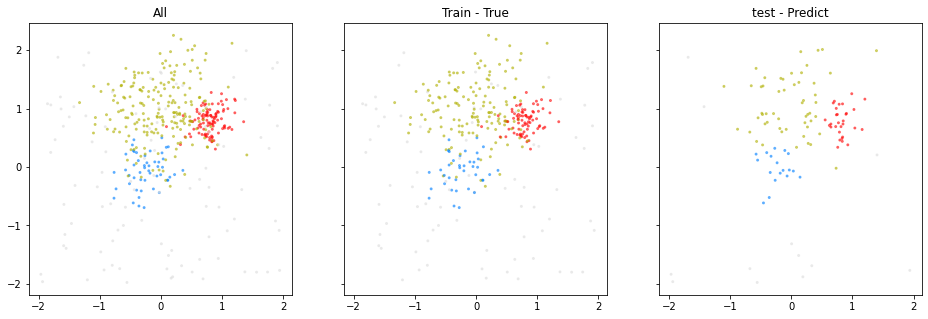

In [671]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(16,5)

ax1.scatter(extended_data[:,0], extended_data[:,1], c=v, **plot_params)
ax1.set_title('All')

ax2.scatter(in_train[:,0], in_train[:,1], c=target_train, **plot_params)
ax2.set_title('Train - True')

ax3.scatter(in_test[:,0], in_test[:,1], c=svm_pred3, **plot_params)
ax3.set_title('test - Predict')

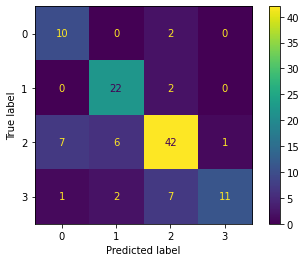

In [668]:
conf_mat = sklearn.metrics.confusion_matrix(target_test, svm_pred3)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [ ]:
## Cross validation and ensembles

In [709]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=7)
rkf.get_n_splits(extended_data, extended_classes)
print(rkf)

RepeatedKFold(n_repeats=2, n_splits=5, random_state=7)


In [715]:
n = len(extended_classes)
ave_class = np.zeros(n)
ave_counts = np.zeros(n)

for i, (train_index, test_index) in enumerate(rkf.split(extended_data)):

    svm_model = sklearn.svm.SVC()
    svm_model.fit(extended_data[train_index], extended_classes[train_index])
    svm_pred = svm_model3.predict(extended_data[test_index])
    
    acc = sklearn.metrics.accuracy_score(extended_classes[test_index], svm_pred)
    
    ave_class[test_index] += svm_pred
    ave_counts[test_index] += 1.0
    
    print(f"Model:{i} accuracy:{acc:.2f}")
    
ave_class /= ave_counts


# More here

Model:0 accuracy:0.79
Model:1 accuracy:0.79
Model:2 accuracy:0.83
Model:3 accuracy:0.81
Model:4 accuracy:0.86
Model:5 accuracy:0.83
Model:6 accuracy:0.83
Model:7 accuracy:0.77
Model:8 accuracy:0.81
Model:9 accuracy:0.83


## Overall workflow

+++

High-dimensionality data; everything as a vector

- proteomics data?
- mnist

Load a digit dataset provided by sklearn, use this later at higher res with DNNs

Each image is 64 pixel intensities

Total of 1797 images with correponding class labels [0 .. 9]

In [437]:
digits = sklearn.datasets.load_digits()
digit_data = digits.data
digit_labels = digits.target
print(digit_data.shape, digit_labels.shape)

(1797, 64) (1797,)


Can turn each data point into a 8 * 8 square array and plot it as an image/density

In [ ]:
First we visualise this data.

Data has 64 independent (though often correlated) values for each point/example. Would say it as 64 dimensions. 

To visualise we will project this down to two dimensions. Use two common methods for this PCA and UMAP.

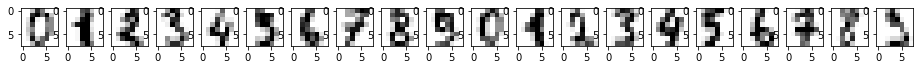

In [438]:
fig, axs = plt.subplots(1, 20)
fig.set_size_inches(16,8)
for i in range(20):
    axs[i].imshow(digit_data[i].reshape(8,8), cmap='Greys')

PCA finds the linear directionsin the data (a weighted combination of the 64 dimensions) that maximise the variance; show most spread.

The second PC is then a direction orthogonal to the first that shows the max variabne in what remains. A way of showing the most impotant aspects of the data in a 2D * or N if wee keep N components).

In [538]:
pca_model = sklearn.decomposition.PCA(2)
pca_model.fit(digit_data)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


Run the `.transform()` method to convert 64 dims to 2 dims.

In [539]:
pca_proj = pca_model.transform(digit_data)
print(pca_proj.shape)

(1797, 2)


Unlike PCA with is maximising dissimilarity, UMAP seeks to ploy points in a lower dim space to maximise similarity of close moints. It is invoked in an analogous manner.

In [540]:
from umap import UMAP
umap_model = UMAP(n_components=2)
umap_model.fit(digit_data)
umap_proj = umap_model.transform(digit_data)
print(umap_proj.shape)

(1797, 2)


We can plot the 2D projections generated by PCA and UMAP. Though they both separate the class labels, as indicated with different colors, UMAP does a superb job at separating the labels. In essence PCA does less well because the boundaries cannot be describes in a linear manner (compare kMeans with KNN above)


Caveats to interpreting UMAP; PCA positioning more meaningful. UMAP subject to flipping and rotation. 

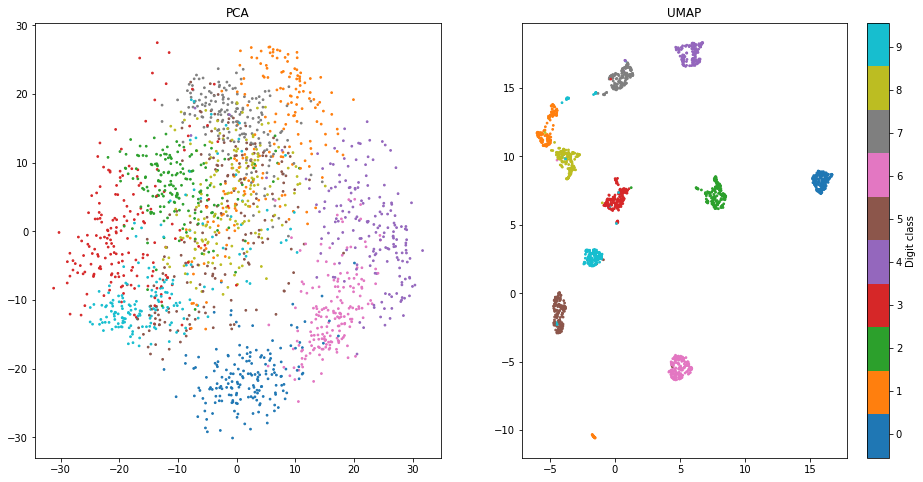

In [541]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)

ax1.scatter(pca_proj[:,0], pca_proj[:,1], s=3, c=digit_labels, cmap='tab10')
ax1.set_title('PCA')

sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, c=digit_labels, cmap='tab10')
ax2.set_title('UMAP')
cb2 = fig.colorbar(sc, ax=ax2)
cb2.ax.set_yticks(np.linspace(0.5, 8.5, 10))
cb2.ax.set_yticklabels(range(10))
cb2.set_label('Digit class')

In [443]:
knn_model3 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model3.fit(digit_data, digit_labels)
knn_classes3 = knn_model3.predict(digit_data)

svm_model3 = sklearn.svm.SVC()
svm_model3.fit(digit_data, digit_labels)
svm_classes3 = svm_model3.predict(digit_data)

# Test - train split


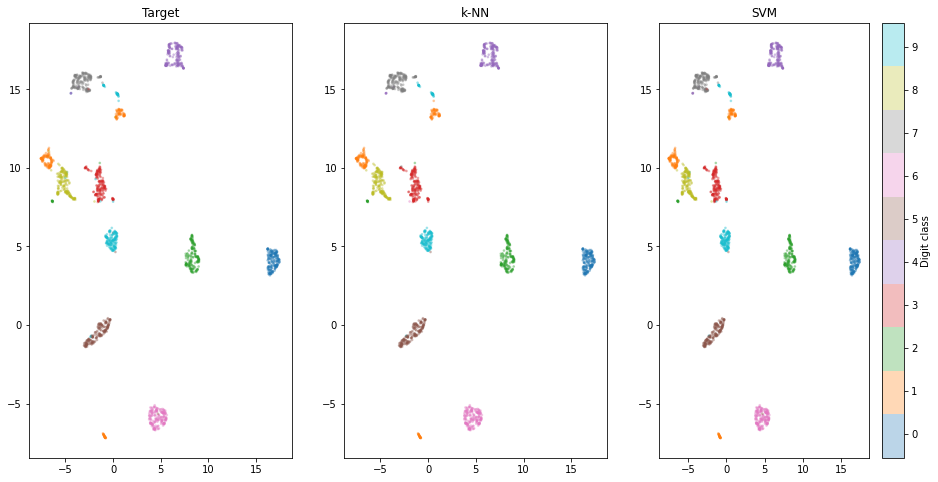

In [447]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_size_inches(16,8)

ax0.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.3, c=digit_labels, cmap='tab10')
ax0.set_title('Target')

ax1.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.3, c=knn_classes3, cmap='tab10')
ax1.set_title('k-NN')

sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.3, c=svm_classes3, cmap='tab10')
ax2.set_title('SVM')

cb2 = fig.colorbar(sc, ax=ax2)
cb2.ax.set_yticks(np.linspace(0.5, 8.5, 10))
cb2.ax.set_yticklabels(range(10))
cb2.set_label('Digit class')

## Test train split

Homogenous vs hetrogenous data

  - Variable correlations
  - FactorAnalysis vs PCA
  - GLS

In [678]:
bc_set = sklearn.datasets.load_breast_cancer()
print(bc_set.keys())
print(bc_set['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

  - mention scaling leak
  - test vs validation set

In [679]:
bc_data = bc_set.data
bc_labels = bc_set.target

in_train, in_test, out_train, out_test = sklearn.model_selection.train_test_split(bc_data, bc_labels)

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(in_train)
in_train = scaler.transform(in_train)
in_test = scaler.transform(in_test)

scaled_bc_data = scaler.transform(bc_data)

print(in_train.shape, in_test.shape)
print(out_train.shape, out_test.shape)

(426, 30) (143, 30)
(426,) (143,)


## Class imbalance

  - under and over sampling
  - mention class weights
  - mention smote
  

In [704]:
# Under sampling example

# Fetch indices
class0 = np.nonzero(bc_labels == 0)[0]
class1 = np.nonzero(bc_labels == 1)[0]

print(class0[:10])
print(class1[:10])

[0 1 2 3 4 5 6 7 8 9]
[19 20 21 37 46 48 49 50 51 52]


In [705]:
n0 = len(class0)
n1 = len(class1)

print(n0, n1)

212 357


In [706]:
np.random.shuffle(class1)
class1_subset = class1[:n0]

n2_s = len(class1_subset)

print(n2_s)

212


In [707]:
balanced_idx = np.concatenate([class0, class1_subset])
balanced_labels = bc_labels[balanced_idx]
balanced_data = bc_data[balanced_idx]
print(balanced_data.shape)

(424, 30)


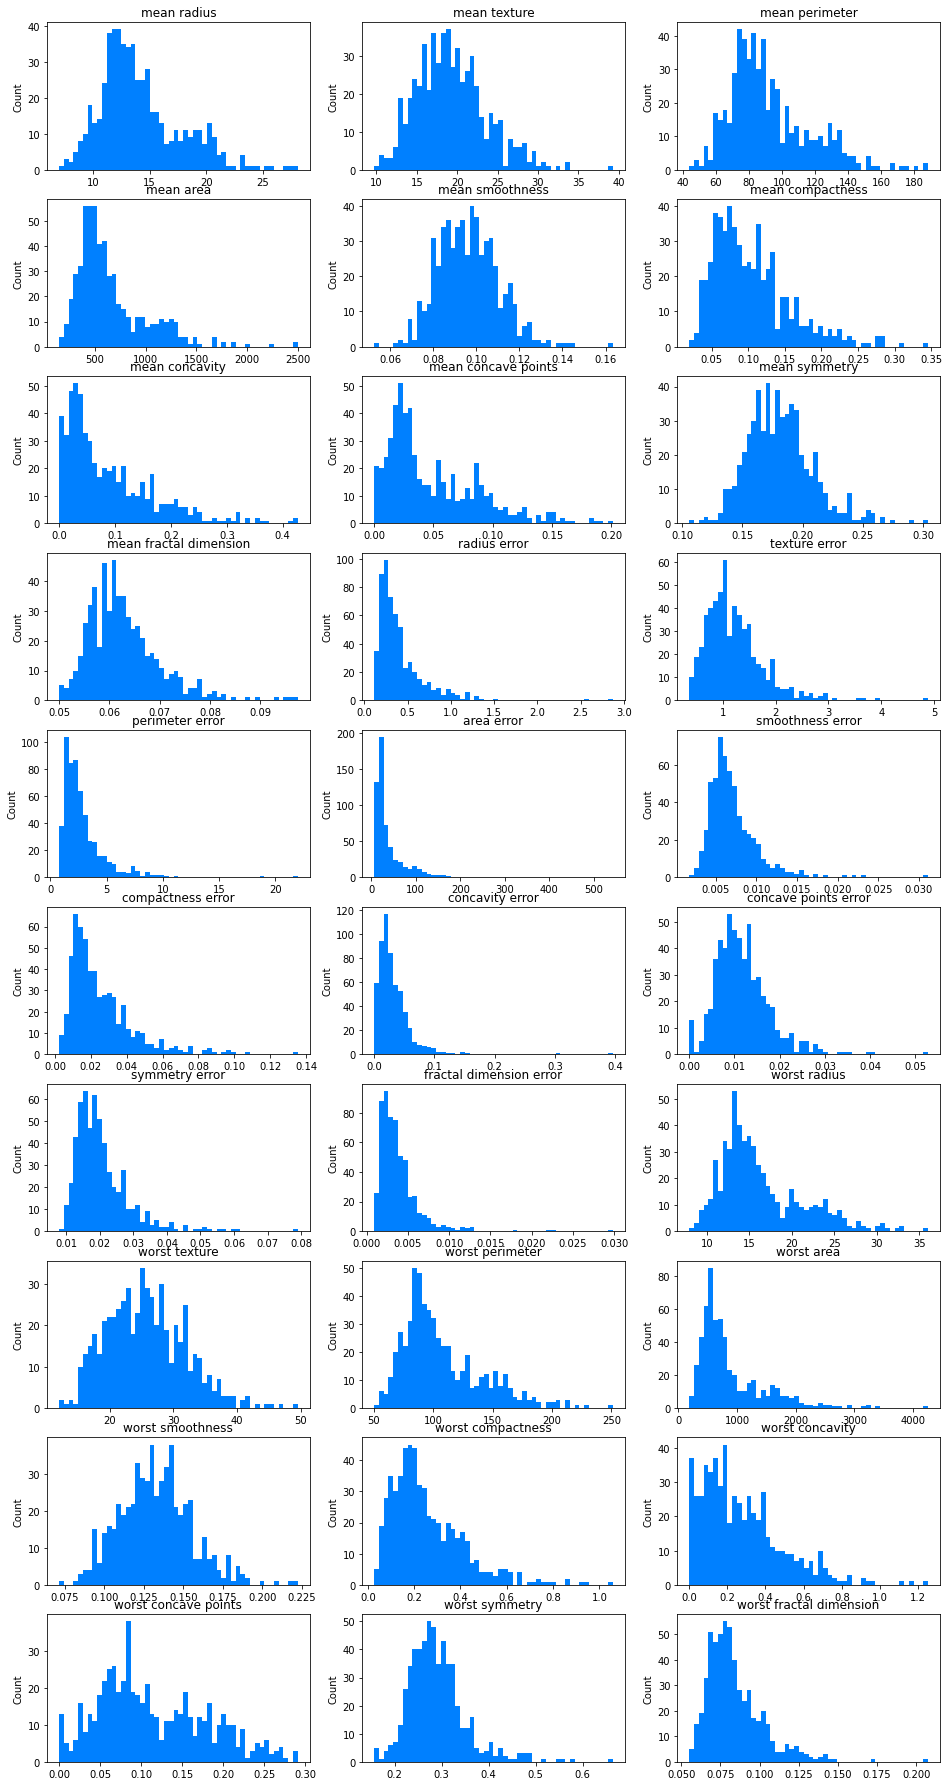

In [680]:
n, m = bc_data.shape

fig, axs = plt.subplots(10, 3)
fig.set_size_inches(16,32)

for i in range(m):
    ax = axs[i // 3, i % 3]
    ax.hist(bc_data[:,i], bins=50, color='#0080FF')
    ax.set_title(bc_set.feature_names[i])
    ax.set_ylabel('Count')

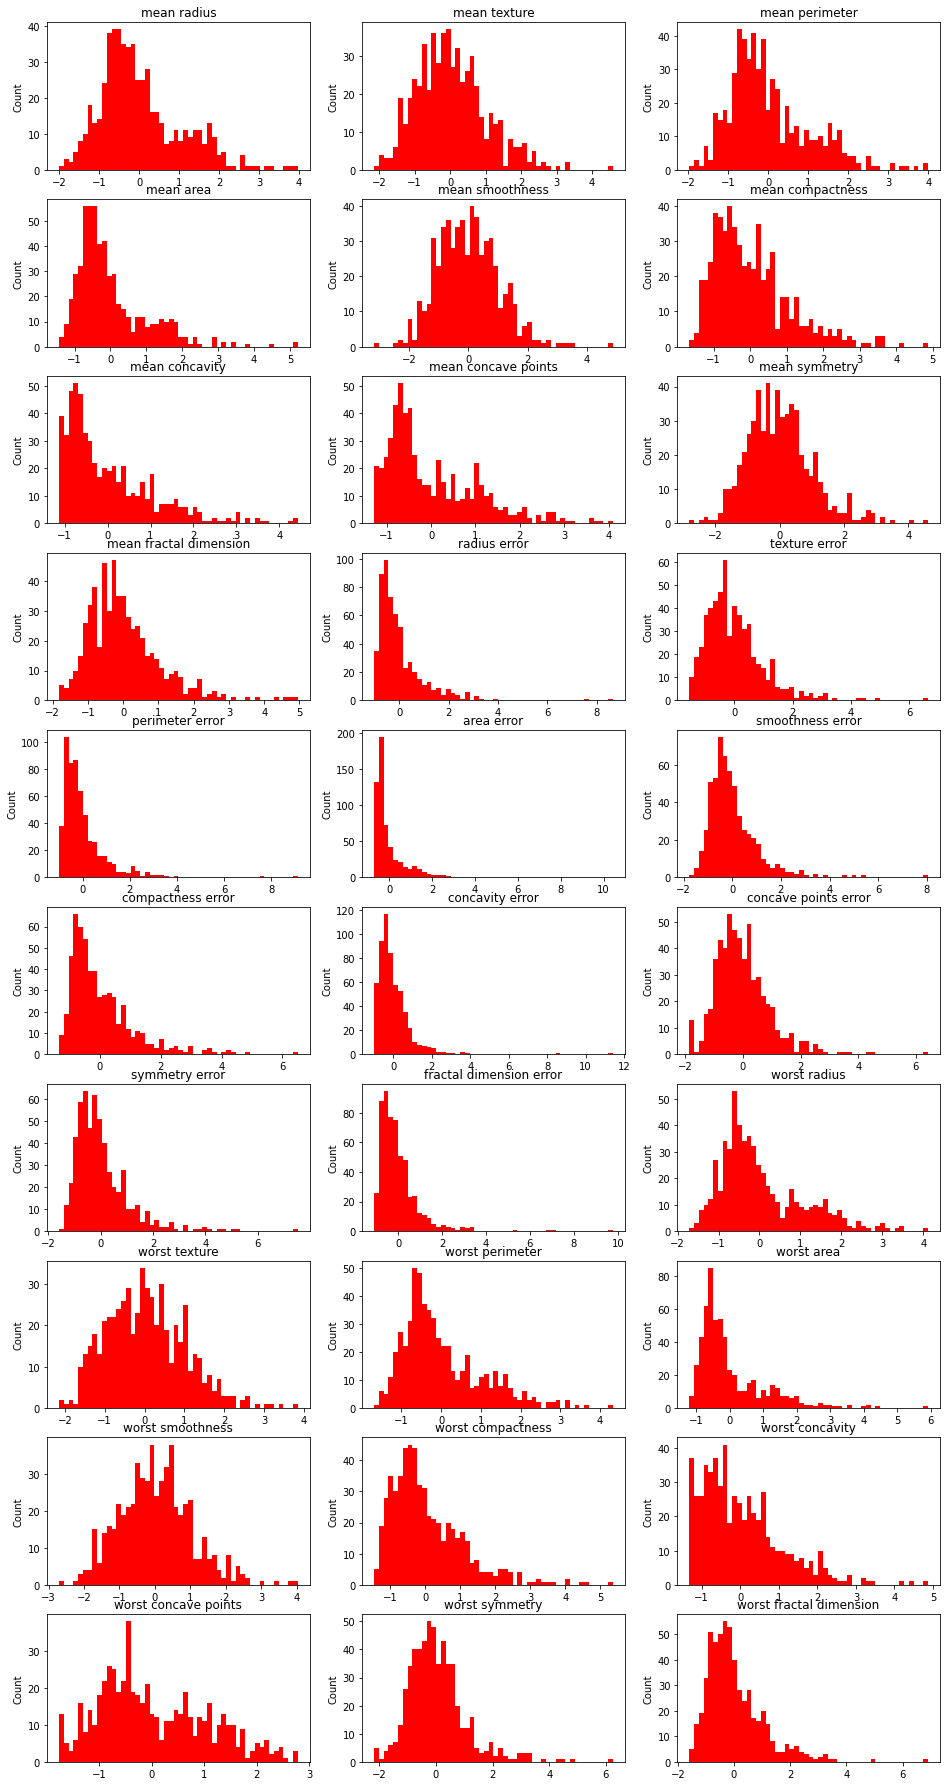

In [681]:
n, m = bc_data.shape

fig, axs = plt.subplots(10, 3)
fig.set_size_inches(16,32)

for i in range(m):
    ax = axs[i // 3, i % 3]
    ax.hist(scaled_bc_data[:,i], bins=50, color='#FF0000')
    ax.set_title(bc_set.feature_names[i])
    ax.set_ylabel('Count')

In [682]:
import course_util as util

,n_neighbors,15
,n_components,2
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


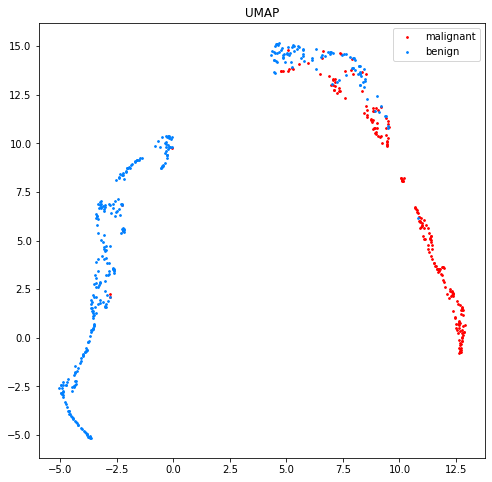

In [683]:
import importlib
importlib.reload(util)
util.plot_umap(bc_data, bc_labels, bc_set.target_names)

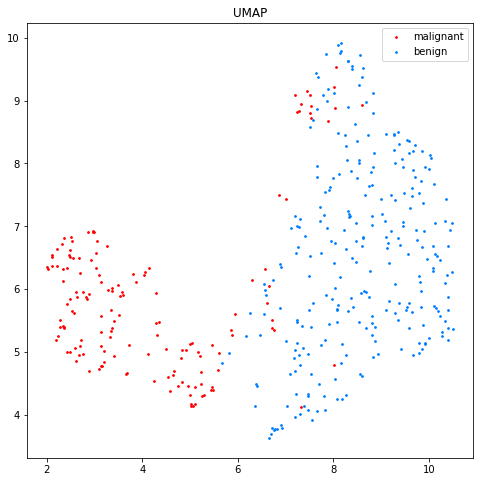

In [684]:
umap_model = util.plot_umap(in_train, out_train, bc_set.target_names)

In [685]:
knn_model4 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model4.fit(in_train, out_train)
knn_classes4 = knn_model4.predict(in_train)
knn_pred = knn_model4.predict(in_test)

svm_model4 = sklearn.svm.SVC()
svm_model4.fit(in_train, out_train)
svm_classes4 = svm_model4.predict(in_train)
svm_pred = svm_model4.predict(in_test)

,n_neighbors,15
,n_components,2
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


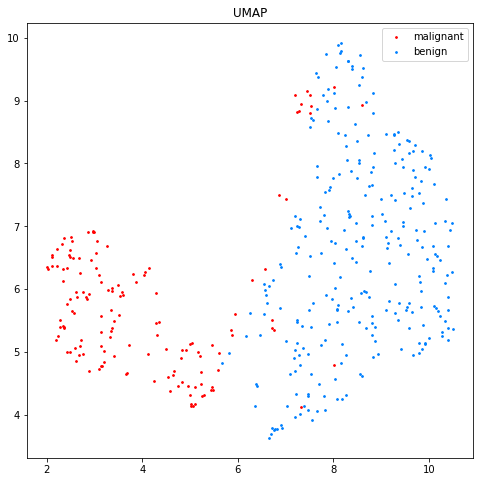

In [687]:
util.plot_umap(in_train, svm_classes4, bc_set.target_names, umap_model=umap_model)

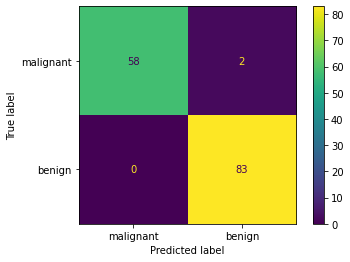

In [688]:
conf_mat = sklearn.metrics.confusion_matrix(out_test, svm_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_mat, display_labels=bc_set.target_names)
disp.plot()

## Assessment metrics
  
  - regression metrics
  - confusion matrix 
  - precision, accuracy, recall, F1
  - ROC

In [ ]:
Precision: TP / (TP + FP) ; Class Correct / Class Predicted  ; correct proportion
    
Recall: TP / (TP + FN) ; Class Correct / Class Total ; found proportion  

In [655]:
pre = sklearn.metrics.precision_score(out_test, svm_pred)
rec = sklearn.metrics.recall_score(out_test, svm_pred)

print(f'Recall:{rec:.2f} F1:{f1:.2f}')

Recall:0.99 F1:0.98


In [ ]:
Accuracy: (TP + TN) / (Pos + Neg) ; Correct / Total
    
F1 = Geometric mean of precision and recall

Cohen's Kappa: How much better than random 

In [656]:
acc = sklearn.metrics.accuracy_score(out_test, svm_pred)
kap = sklearn.metrics.cohen_kappa_score(out_test, svm_pred)
f1 = sklearn.metrics.f1_score(out_test, svm_pred)

print(f'Acc:{acc:.2f} Kappa:{kap:.2f} Precision:{pre:.2f}')

Acc:0.97 Kappa:0.94 Precision:0.97


In [651]:
print(sklearn.metrics.classification_report(out_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Text(0.5, 1.0, '2-class Precision-Recall curve')

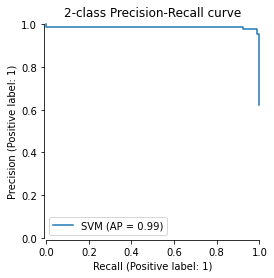

In [644]:
from sklearn.metrics import PrecisionRecallDisplay

fig = PrecisionRecallDisplay.from_estimator(knn_model4, in_test, out_test, name="SVM", despine=True)
fig.ax_.set_title("2-class Precision-Recall curve")

## Feature importance
 
  - permutation_importance

SKLearn site example:

from sklearn.inspection import permutation_importance

r = permutation_importance(model, X_val, y_val,

                           n_repeats=30,

                           random_state=0)


for i in r.importances_mean.argsort()[::-1]:

    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

        print(f"{diabetes.feature_names[i]:<8}"

              f"{r.importances_mean[i]:.3f}"

              f" +/- {r.importances_std[i]:.3f}")
              

In [ ]:
It is possible to do a UMAP then clasify on that. 


In [448]:
housing_data = sklearn.datasets.fetch_california_housing()

In [456]:
print(housing_data.keys())
print(housing_data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [459]:
print(housing_data['data'].shape)
print(housing_data['feature_names'])

(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [460]:
print(housing_data['target'].shape)
print(housing_data['target_names'])

(20640,)
['MedHouseVal']


Samples vs features


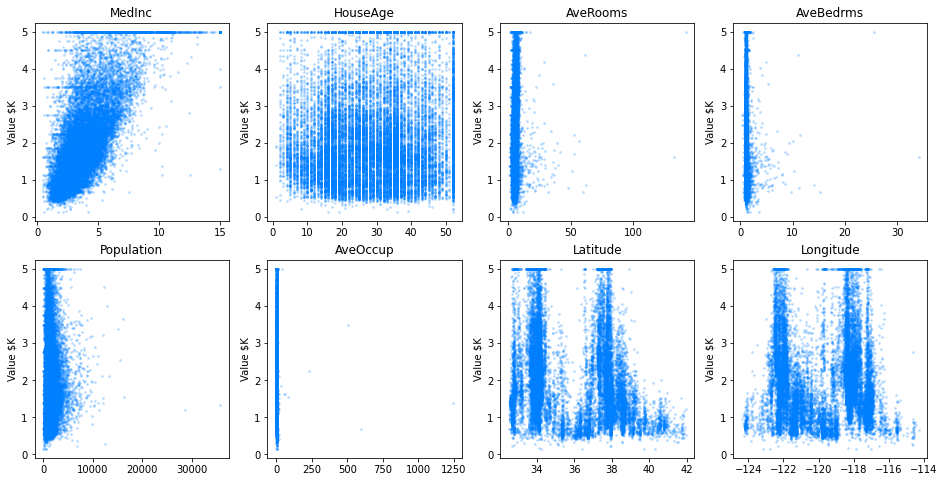

In [471]:
n, m = housing_data['data'].shape

fig, axs = plt.subplots(2, 4)
fig.set_size_inches(16,8)

house_vals = housing_data['target']
train_data = housing_data['data']

for i in range(m):
    ax = axs[i // 4, i % 4]
    ax.scatter(train_data[:,i], house_vals, color='#0080FF', s=3, alpha=0.2)
    ax.set_title(housing_data['feature_names'][i])
    ax.set_ylabel('Value $K')

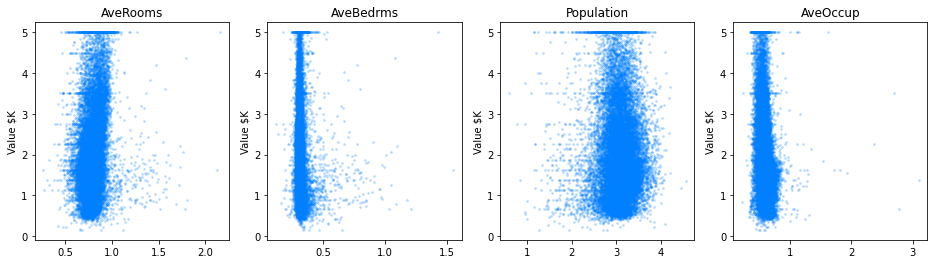

In [504]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(16,4)

for i in [2,3,4,5]:
    ax = axs[i-2]
    ax.scatter(np.log10(train_data[:,i]+1.0), house_vals, color='#0080FF', s=3, alpha=0.2)
    ax.set_title(housing_data['feature_names'][i])
    ax.set_ylabel('Value $K')

In [ ]:
umap_model = UMAP(n_components=2)
umap_model.fit(train_data)
umap_proj = umap_model.transform(train_data)

In [487]:
pca_model = sklearn.decomposition.PCA(n_components=2)
pca_model.fit(train_data)
pca_proj = pca_model.transform(train_data)

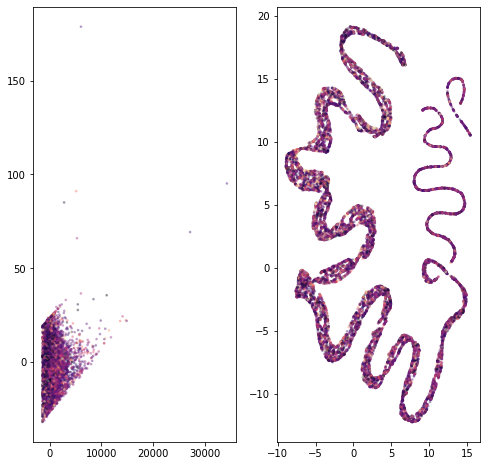

In [489]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(8,8)

ax1.scatter(pca_proj[:,0], pca_proj[:,1], s=3, alpha=0.3, c=house_vals, cmap='magma')
ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.3, c=house_vals, cmap='magma')

## Data preprocessing, normalisation

  - demo standard scaler : before and after 2D
  

In [548]:
scaler1 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler1.fit(train_data)
scaled_data1 = scaler1.transform(train_data)

scaler2 = sklearn.preprocessing.PowerTransformer()
scaler2.fit(train_data)
scaled_data2 = scaler2.transform(train_data)

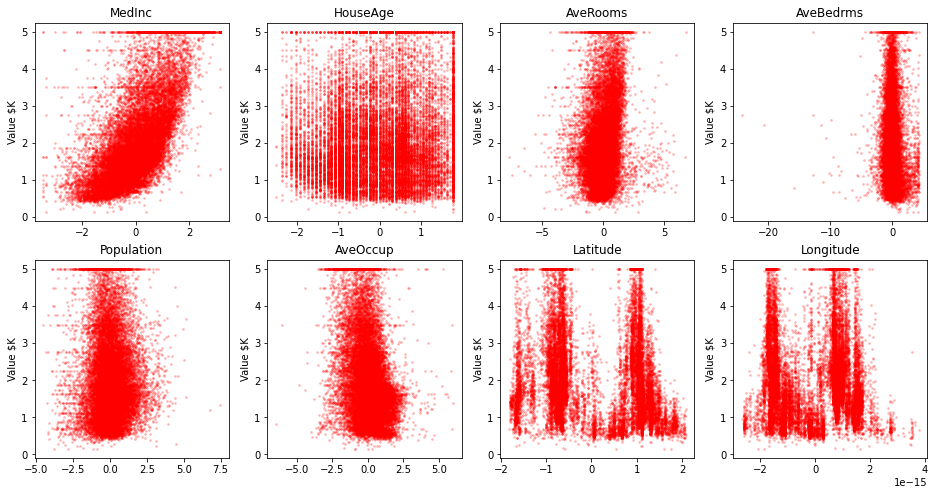

In [549]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(16,8)

for i in range(m):
    ax = axs[i // 4, i % 4]
    ax.scatter(scaled_data2[:,i], house_vals, color='#FF0000', s=3, alpha=0.2)
    ax.set_title(housing_data['feature_names'][i])
    ax.set_ylabel('Value $K')

In [550]:
umap_model = UMAP(n_components=2)
umap_model.fit(scaled_data2)
umap_proj = umap_model.transform(scaled_data2)

pca_model = sklearn.decomposition.PCA(n_components=2)
pca_model.fit(scaled_data2)
pca_proj = pca_model.transform(scaled_data2)
                              

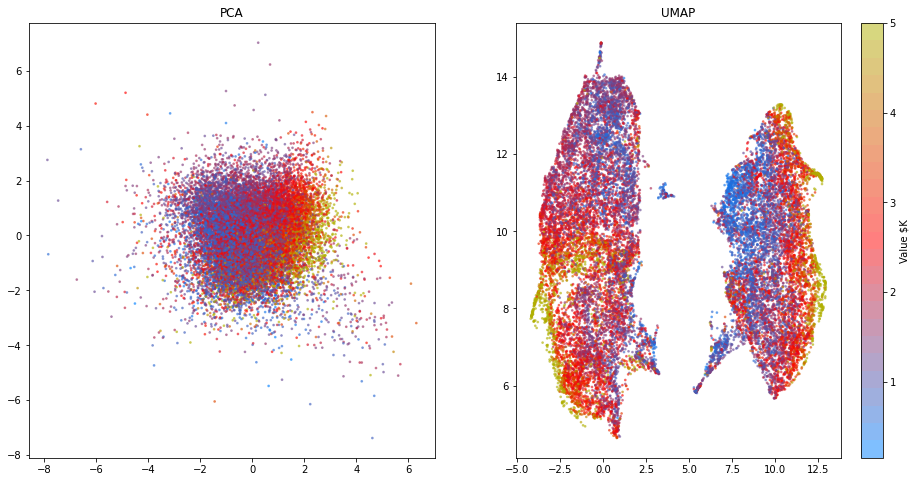

In [551]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)

ax1.scatter(pca_proj[:,0], pca_proj[:,1], s=3, alpha=0.5, c=house_vals, cmap=cmap1)
ax1.set_title('PCA')
sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.5, c=house_vals, cmap=cmap1)
ax2.set_title('UMAP')

cb2 = fig.colorbar(sc, ax=ax2)
cb2.set_label('Value $K')

Show a simple least squares regression?

Show SVM regression

In [552]:
scaled_vals = house_vals / house_vals.max()
svr_model = sklearn.svm.SVR()
svr_model.fit(scaled_data2, house_vals)
predicted_vals = svr_model.predict(scaled_data2)

Text(0, 0.5, 'Prediction')

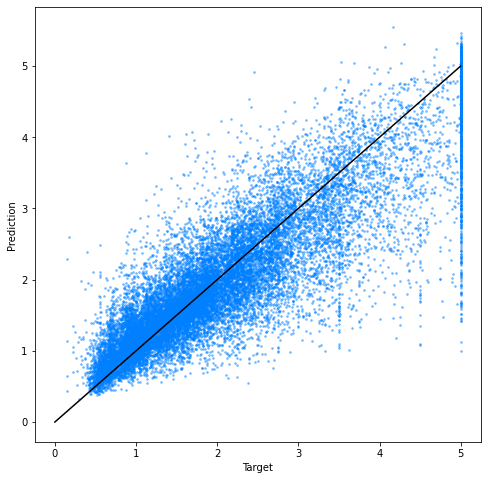

In [553]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(house_vals, predicted_vals, s=3, color='#0080FF', alpha=0.4)
ax.plot([0.0, 5.0], [0.0, 5.0], color='k')
ax.set_xlabel('Target')
ax.set_ylabel('Prediction')

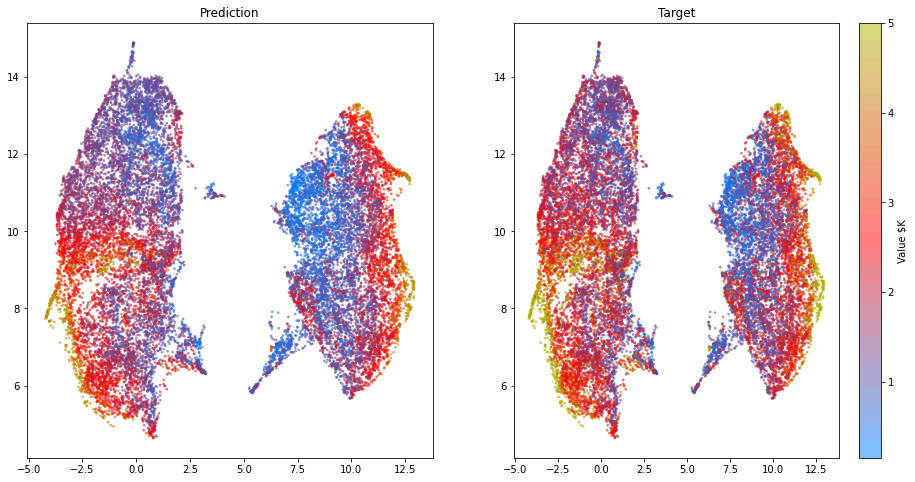

In [554]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)

ax1.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.5, c=predicted_vals, cmap=cmap1)
ax1.set_title('Prediction')

sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.5, c=house_vals, cmap=cmap1)
ax2.set_title('Target')

cb2 = fig.colorbar(sc, ax=ax2)
cb2.set_label('Value $K')

## Missing values

Ensemble training

  - cross-validation
  

## Lastly

Model choice

  - tuning hyperparameters
  - auto sklearn
  